# LetsGrowMore VIP in Data Science
## Batch: November- 2021
## Author: Aarushi Gupta
## 3- Intermediate Level Task
## Prediction using Decision Tree  Algorithm 

###### Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly. 
###### Decision Tree Classifier is a tool that has applications spanning several different areas. Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.


### 1. Importing Relevent Libraries

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### 2. Loading the dataset

In [2]:
# loading the data
data=pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# dimensions of the dataset
data.shape

(150, 5)

### 3. Exploring the data

In [4]:
# Finding the missing values
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# Exploring the dataset
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


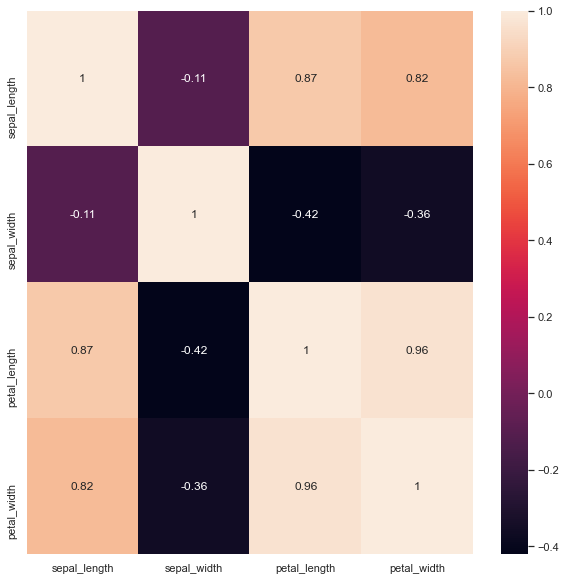

In [6]:
#corr() is used to find the pairwise correlation of all columns in the dataframe.
plt.figure(figsize=(10,10))
fig=sns.heatmap(data.corr(),annot=True)
plt.show()

### 4. Label Encoding of datasets in Python
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.
Encode target labels with value between 0 and n_classes-1.

In [7]:
# Importing the library for label encoding
from sklearn.preprocessing import LabelEncoder

In [8]:
# Creating the instance of the class LabelEncoder and fitting the column that needs to be changed to labels
label_enco=LabelEncoder()
data['species']=label_enco.fit_transform(data['species'])

In [9]:
data['species'].unique()

array([0, 1, 2])

### 5. Splitting the dataset into train and test

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score
# Declaring the dependent and independent variables
X=data.drop('species',axis=1)
y=data['species']
# Splitting the data into 80% training data and 20% test data
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=62)
xtrain.shape,xtest.shape

((120, 4), (30, 4))

### 6. Scaling the data 
Standardize features by removing the mean and scaling to unit variance.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

### 7. Creating the model

In [12]:
# Importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [13]:
# Creating the instance of the class DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=10)
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=10)

In [14]:
# Printing the accuracy score for test and train dataset
print("Accuracy of train data is",dt_model.score(xtrain,ytrain))
print("Accuracy of test data is",dt_model.score(xtest,ytest))

Accuracy of train data is 1.0
Accuracy of test data is 0.9333333333333333


In [15]:
# creating an array of train and test accuracy using different depths
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(xtrain, ytrain)
    train_accuracy.append(dt_model.score(xtrain, ytrain))
    validation_accuracy.append(dt_model.score(xtest, ytest))

In [16]:
# creating the dataframe for printing the train and test accuracies for each iteration
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.666667,0.666667
1,2,0.966667,0.933333
2,3,0.983333,0.933333
3,4,1.000000,0.933333
4,5,1.000000,0.933333


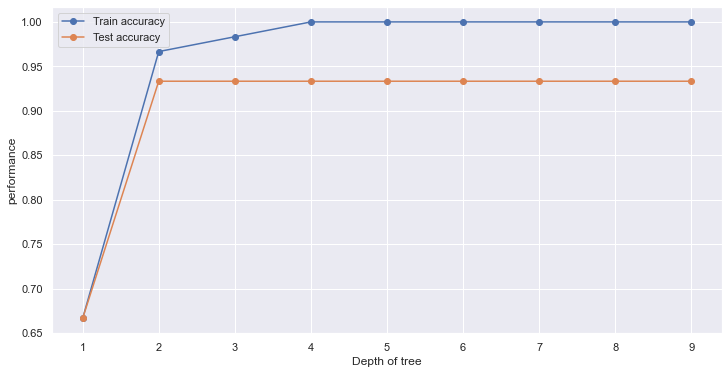

In [19]:
# Creating a plot for comparing the accuracies
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o',label='Train accuracy')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o',label='Test accuracy')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()
plt.show()

In [20]:
# As seen from the graph the optimum depths is 3 for maximum accuracy
dt_model = DecisionTreeClassifier(max_depth=3, random_state=10)

In [21]:
#fitting the model and printing the training score
dt_model.fit(xtrain, ytrain)
print(dt_model.score(xtrain, ytrain))

0.9833333333333333


In [22]:
#printing the test score
y_pred=dt_model.predict(xtest)
#Test score
print(dt_model.score(xtest, ytest))

0.9333333333333333


### 8. Making Decision Tree

In [23]:
# Importing the library for drawing the tree
from sklearn import tree

In [24]:
#DOT extension are template files created by Microsoft Word 
#to have pre-formatted settings for generation of further DOC files.
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X.columns,max_depth=3,filled=True)

In [25]:
!dot -Tpng tree.dot -o tree.png

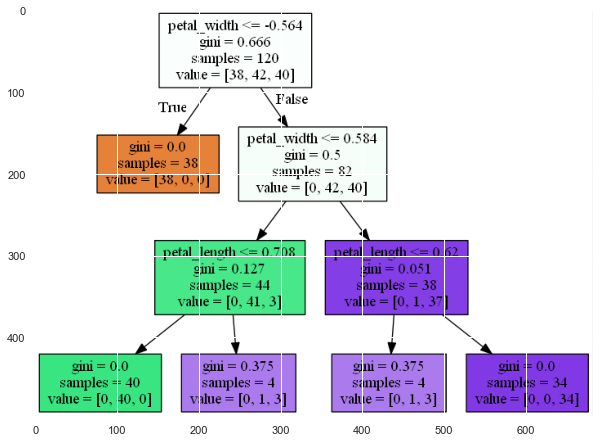

In [26]:
# Loading the .png image which a final decision tree made from the model
image = plt.imread('tree.png')
plt.figure(figsize=(10,10))
plt.imshow(image)

### 9. Printing the accuracy score and confusion matrix for the model

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



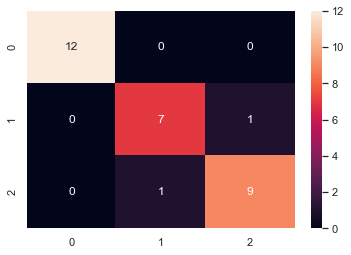

In [27]:
# importing the library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Confusion matrix 
cm= confusion_matrix(ytest, y_pred)
print(cm)
# Using the heatmap for printing the confusion matrix for a nicer way
sns.heatmap(cm, annot=True)
print(accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))